In [1]:
!pip install tensorflow matplotlib opencv-python --quiet

In [2]:
!pip install tensorflow-gpu==2.8.0 --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2023.6.0 requires fsspec==2023.6.0, but you have fsspec 2023.12.2 which is incompatible.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.8.0 which is incompatible.
tensorflow 2.13.0 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.8.0 which is incompatible.
tensorflowjs 4.14.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.


In [14]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
!mkdir ,kaggle
!cp /kaggle/input/kagglekey/kaggle.json .kaggle/
!kaggle datasets download -d salader/dogs-vs-cats --force -p /kaggle/working/

!unzip /root/dogs-vs-cats.zip -d /kaggle/working/dogs-vs-cats/

 99%|██████████████████████████████████████▌| 1.05G/1.06G [00:05<00:00, 250MB/s]
100%|███████████████████████████████████████| 1.06G/1.06G [00:05<00:00, 224MB/s]
unzip:  cannot find or open /root/dogs-vs-cats.zip, /root/dogs-vs-cats.zip.zip or /root/dogs-vs-cats.zip.ZIP.


In [20]:
import zipfile
zipper = zipfile.ZipFile("/kaggle/working/dogs-vs-cats.zip")
zipper.extractall("/kaggle/working/")
zipper.close()

In [21]:
os.remove("/kaggle/working/dogs-vs-cats.zip")

In [18]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [23]:
import pandas as pd


In [25]:
train_files = []
train_categories = []
for i in os.listdir("/kaggle/working/train/cats"):
    train_files.append(i)
    train_categories.append(0)

for i in os.listdir("/kaggle/working/train/dogs"):
    train_files.append(i)
    train_categories.append(1)


In [26]:
train_df = pd.DataFrame({
    'filename': train_files,
    'category': train_categories
})

In [27]:
train_df.category.value_counts()

category
0    10000
1    10000
Name: count, dtype: int64

In [28]:
test_files = []
test_categories = []
for i in os.listdir("/kaggle/working/test/cats/"):
    test_files.append(i)
    test_categories.append(0)

for i in os.listdir("/kaggle/working/test/dogs/"):
    test_files.append(i)
    test_categories.append(1)

test_df = pd.DataFrame({
    'filename': test_files,
    'category': test_categories
}) 


In [29]:
test_df['category'].value_counts()

category
0    2500
1    2500
Name: count, dtype: int64

In [31]:
data = tf.keras.utils.image_dataset_from_directory("/kaggle/working/train",shuffle=True)

Found 20000 files belonging to 2 classes.


In [32]:
data_iterator = data.as_numpy_iterator()

In [33]:
batch = data_iterator.next()

In [34]:
batch[0]

array([[[[212.58722 , 191.58722 , 172.58722 ],
         [189.3439  , 168.3439  , 149.3439  ],
         [209.3057  , 188.3057  , 169.3057  ],
         ...,
         [ 18.802734,  16.802734,  19.802734],
         [ 16.973343,  14.973343,  17.973343],
         [ 13.674286,  11.674286,  14.674286]],

        [[198.7635  , 177.7635  , 158.7635  ],
         [201.44783 , 180.44783 , 161.44783 ],
         [225.42738 , 204.42738 , 185.42738 ],
         ...,
         [ 21.021484,  19.021484,  22.021484],
         [ 19.74414 ,  17.74414 ,  20.74414 ],
         [ 18.608109,  16.608109,  19.608109]],

        [[186.50418 , 165.50418 , 146.50418 ],
         [212.73875 , 191.73875 , 172.73875 ],
         [235.92232 , 214.92232 , 195.92232 ],
         ...,
         [ 24.713165,  22.713165,  25.713165],
         [ 22.896957,  20.896957,  23.896957],
         [ 22.131668,  20.131668,  23.131668]],

        ...,

        [[221.4971  , 194.4971  , 165.4971  ],
         [203.30273 , 176.30273 , 147.30273 ]

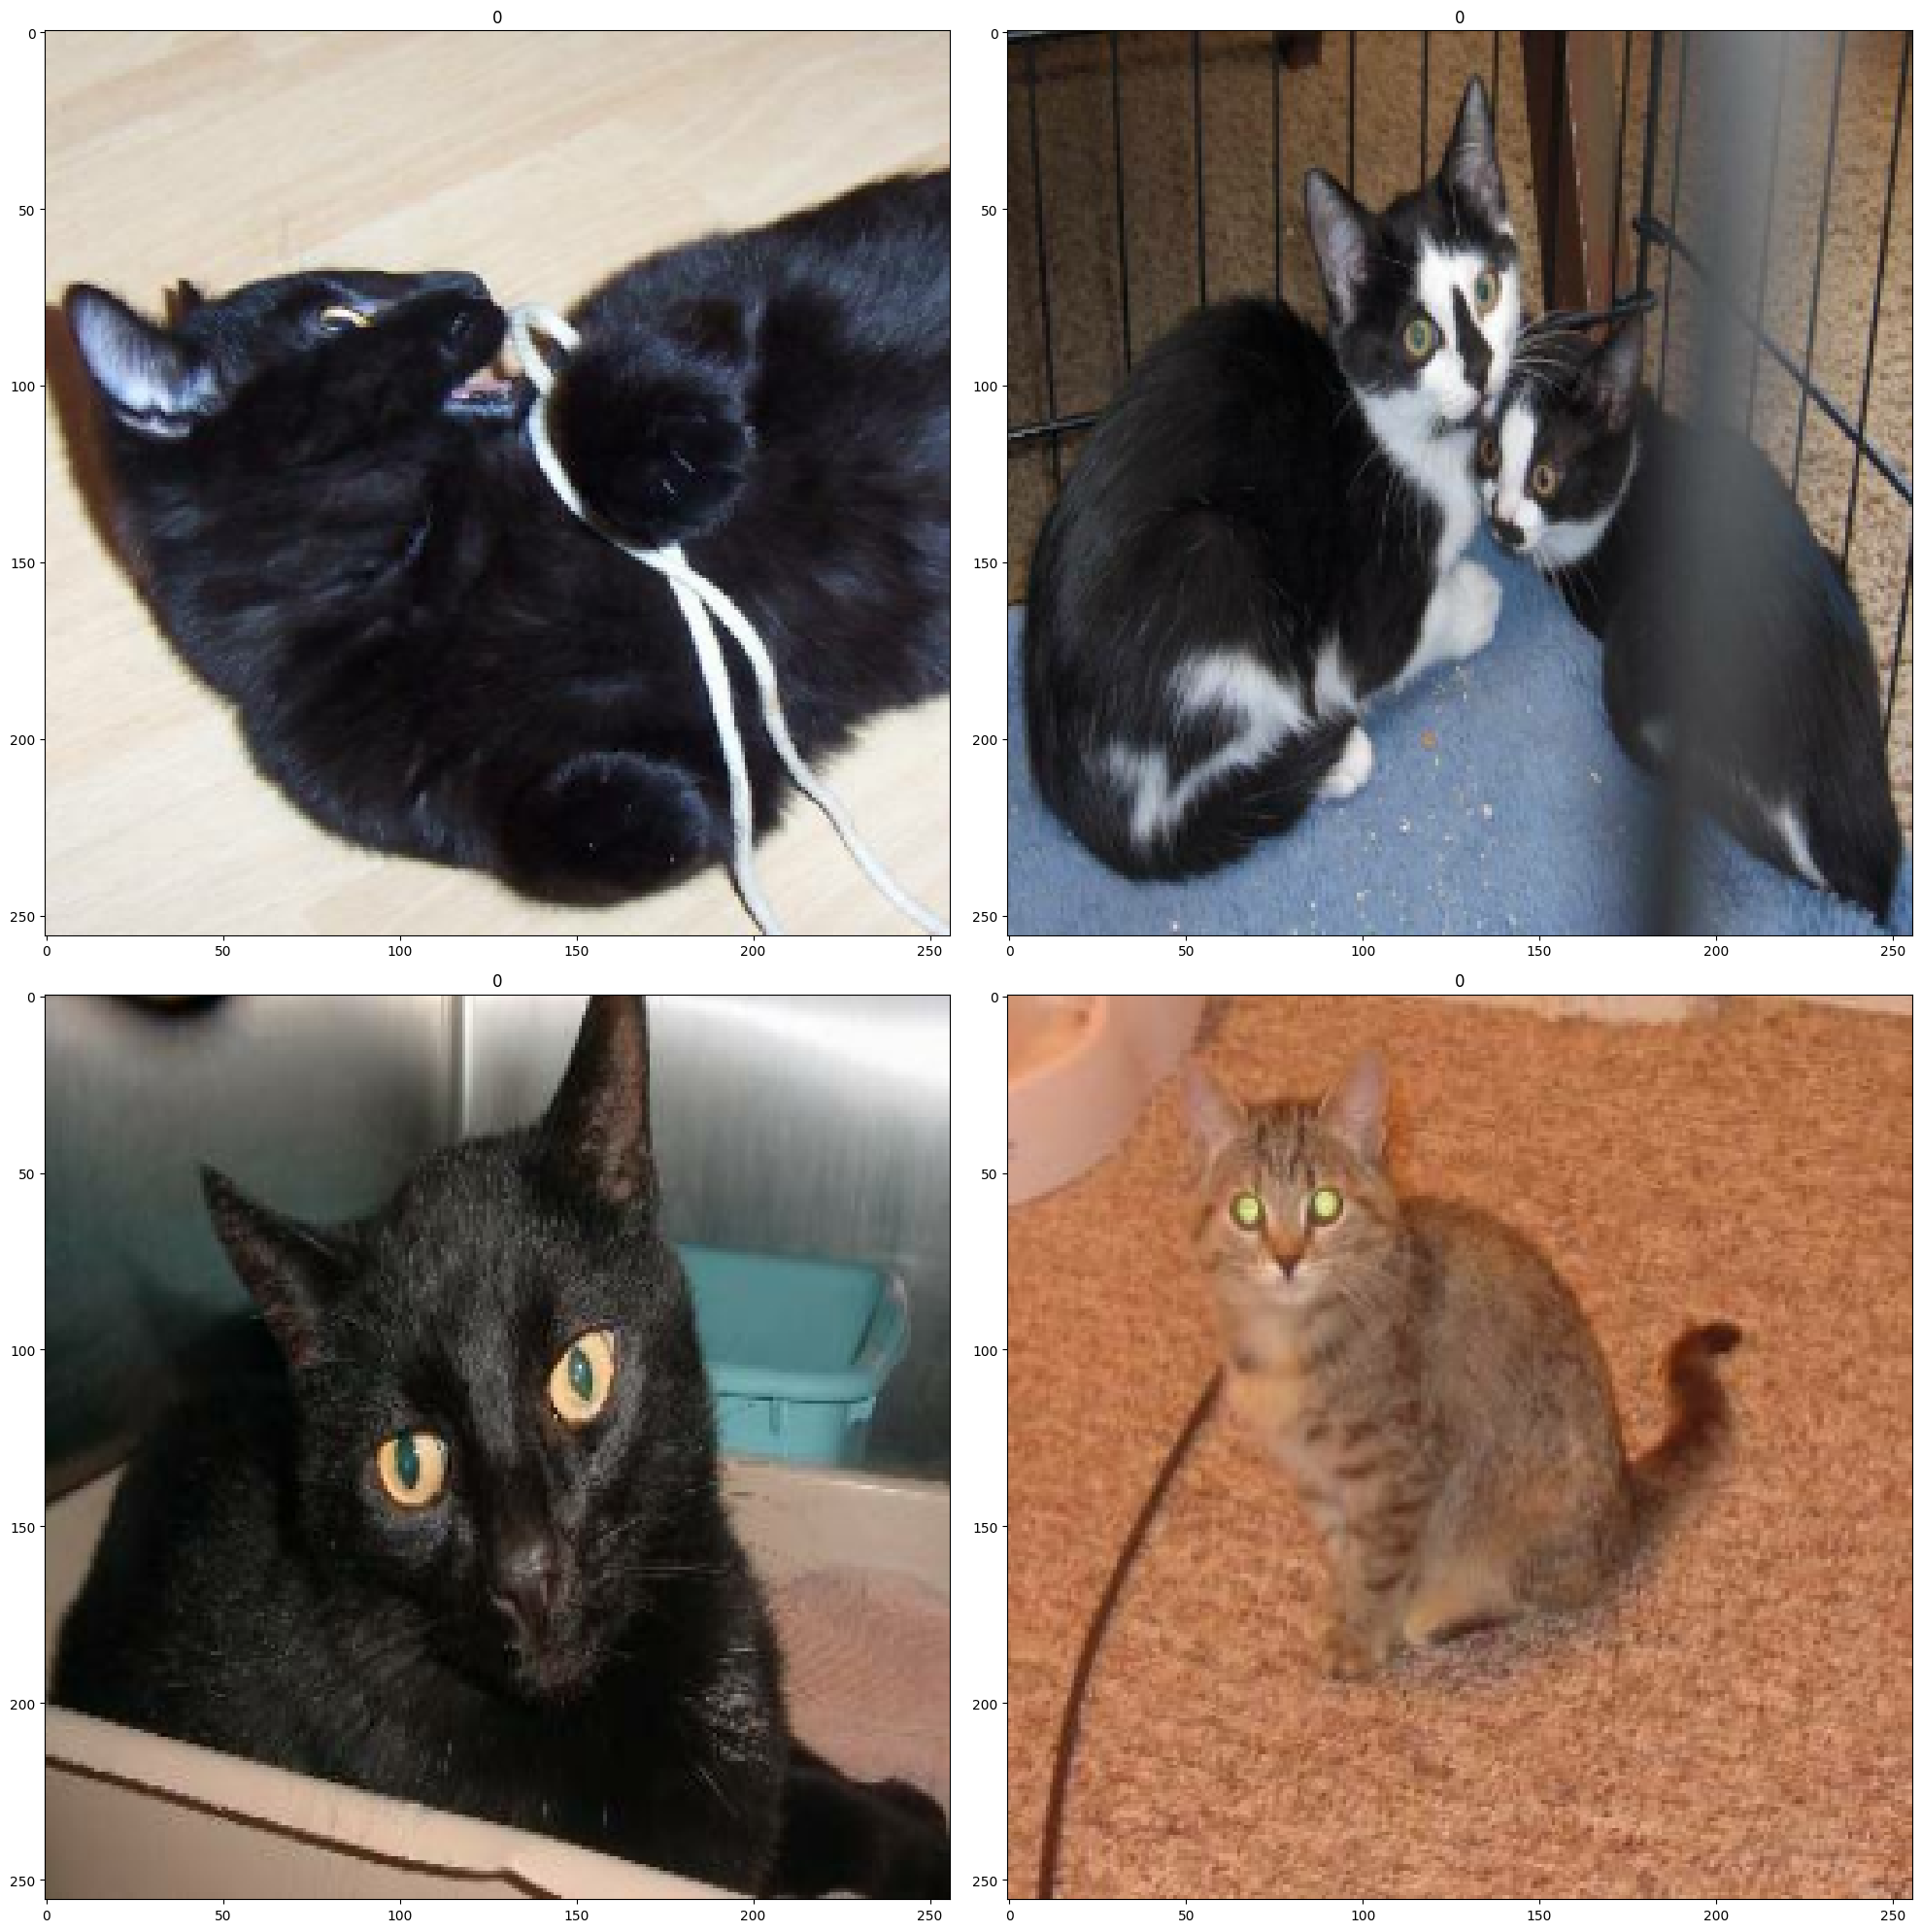

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))  # Create a 2x2 grid of subplots

for idx, img in enumerate(batch[0][:4]):
    row = idx // 2  # Calculate row index
    col = idx % 2   # Calculate column index
    axes[row, col].imshow(img.astype(int))  # Display image on corresponding subplot
    axes[row, col].set_title(batch[1][idx])  # Set title

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [35]:
data = data.map(lambda x,y: (x/255,y))

In [36]:
scaled_iterator = data.as_numpy_iterator()

In [37]:
batch = scaled_iterator.next()

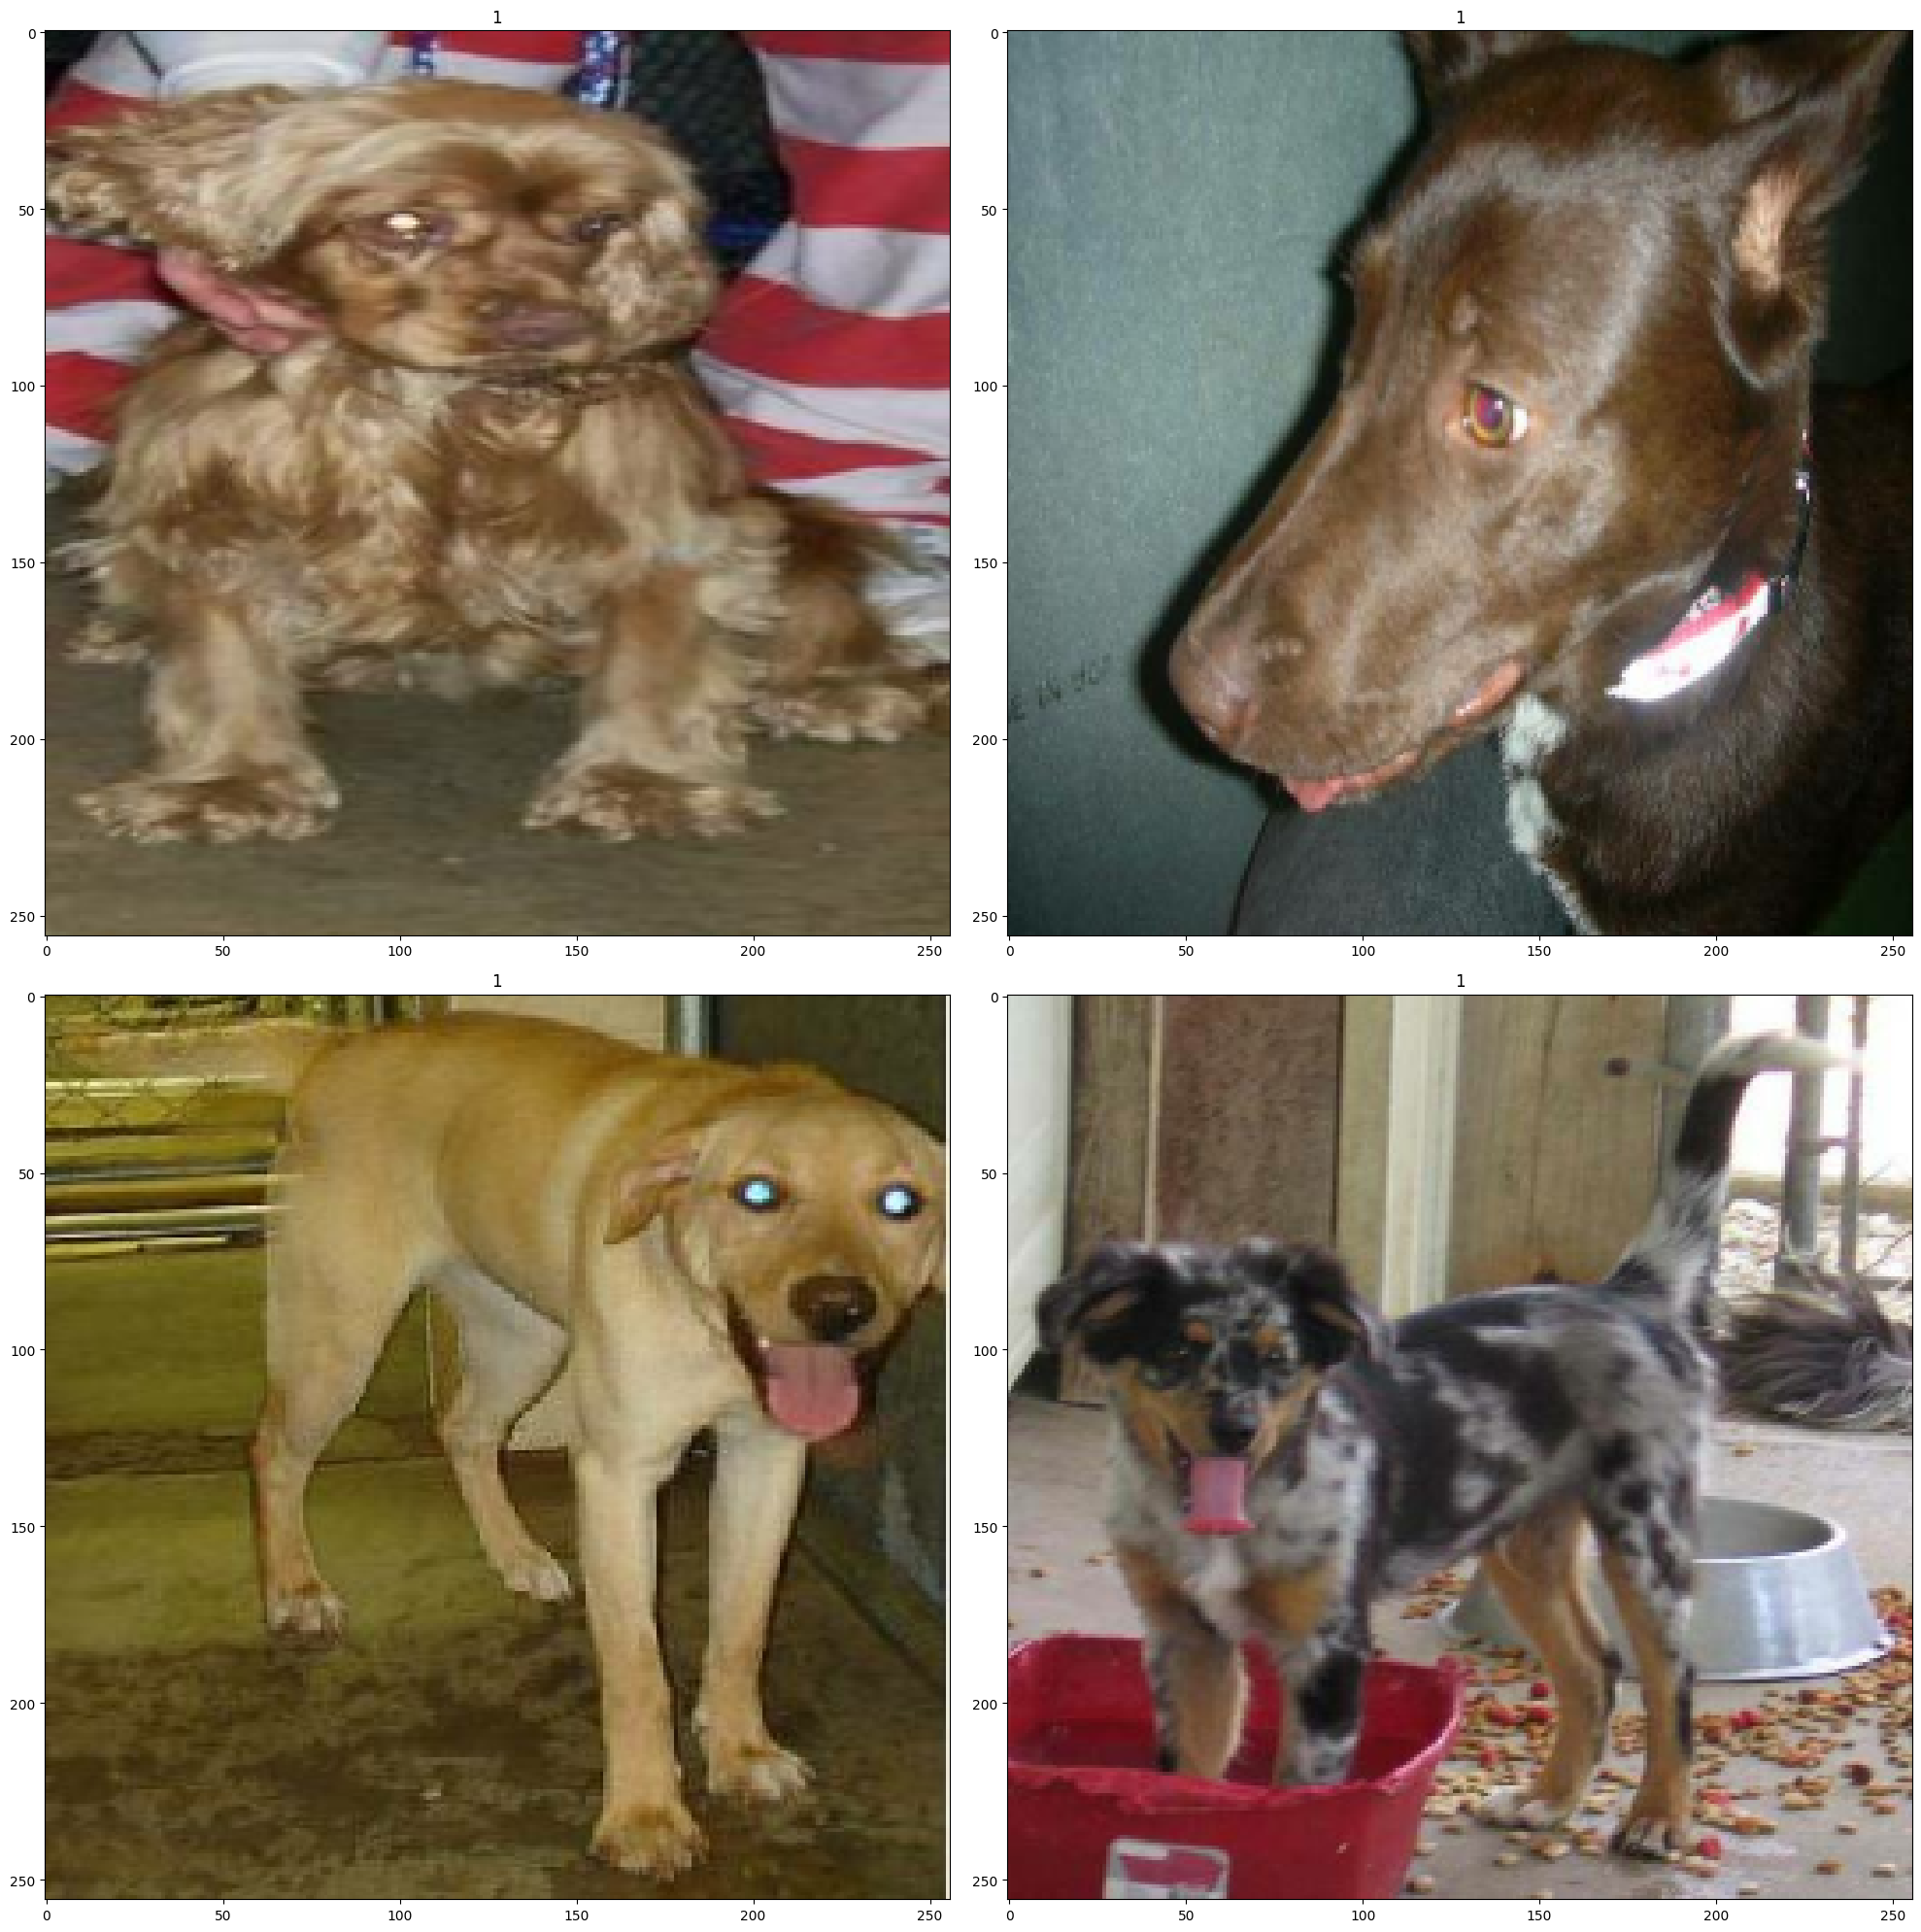

In [117]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))  # Create a 2x2 grid of subplots

for idx, img in enumerate(batch[0][:4]):
    row = idx // 2  # Calculate row index
    col = idx % 2   # Calculate column index
    axes[row, col].imshow(img.astype(np.float32))  # Display image on corresponding subplot
    axes[row, col].set_title(batch[1][idx])  # Set title

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [38]:
val_data = tf.keras.utils.image_dataset_from_directory("/kaggle/working/test")

Found 5000 files belonging to 2 classes.


In [39]:
testing_iterator = val_data.as_numpy_iterator()

In [40]:
test_batch = testing_iterator.next()
test_batch

(array([[[[126.36133 , 131.36133 , 134.36133 ],
          [124.4668  , 129.4668  , 132.4668  ],
          [124.29541 , 129.29541 , 132.29541 ],
          ...,
          [ 73.06592 ,  78.06592 ,  71.06592 ],
          [ 73.      ,  78.      ,  71.      ],
          [ 73.      ,  78.      ,  71.      ]],
 
         [[131.65039 , 136.65039 , 139.65039 ],
          [129.75586 , 134.75586 , 137.75586 ],
          [128.3428  , 133.3428  , 136.3428  ],
          ...,
          [ 74.12891 ,  79.12891 ,  72.12891 ],
          [ 73.2168  ,  78.2168  ,  71.2168  ],
          [ 73.2168  ,  78.2168  ,  71.2168  ]],
 
         [[133.27734 , 138.27734 , 141.27734 ],
          [131.04054 , 136.04054 , 139.04054 ],
          [128.17969 , 133.17969 , 136.17969 ],
          ...,
          [ 75.27344 ,  80.27344 ,  73.27344 ],
          [ 74.34227 ,  79.34227 ,  72.34227 ],
          [ 74.      ,  79.      ,  72.      ]],
 
         ...,
 
         [[147.36133 , 172.36133 , 107.36133 ],
          [148.571

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),strides=1,activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=1,activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16,kernel_size=(3,3),strides=1,activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from kerastuner import HyperModel, RandomSearch

def model_builder(hp):
    model = keras.Sequential()

    # Convolutional layers for image feature extraction
    model.add(keras.layers.Conv2D(filters=hp.Int('filters_1', 32, 128, step=32),
                                  kernel_size=(3, 3),
                                  activation='relu',
                                  input_shape=(image_width, image_height, 3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    # Potentially add more convolutional layers
    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(keras.layers.Conv2D(filters=hp.Int(f'filters_{i+2}', 32, 128, step=32),
                                      kernel_size=(3, 3),
                                      activation='relu'))
        model.add(keras.layers.MaxPooling2D((2, 2)))

    # Flatten and dense layers for classification
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=hp.Int('dense_units', 32, 128, step=32),
                                 activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Single output for binary classification

    # Tune learning rate and optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])  # Store optimizer as a string

    model.compile(optimizer=optimizer,  # Use the optimizer string directly
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

image_width = 256
image_height = 256

tuner = RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=10,  # Adjust as needed
    directory='my_dir',
    project_name='cat_dog_tuner'
)

# Pass datasets directly to tuner.search
tuner.search(data, epochs=10, validation_data=val_data)

best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 15m 04s]
val_accuracy: 0.7483999729156494

Best val_accuracy So Far: 0.7710000276565552
Total elapsed time: 01h 03m 07s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
128               |64                |filters_1
1                 |3                 |num_conv_layers
32                |32                |filters_2
64                |32                |dense_units
0.01              |0.001             |learning_rate
sgd               |adam              |optimizer
32                |32                |filters_3
128               |32                |filters_4

Epoch 1/10
625/625 [==============================] - 89s 141ms/step - loss: 0.6738 - accuracy: 0.5755 - val_loss: 26.7685 - val_accuracy: 0.6286
Epoch 2/10
625/625 [==============================] - 88s 141ms/step - loss: 0.6355 - accuracy: 0.6342 - val_loss: 34.5249 - val_accuracy: 0.6516
Epoch 3/10
625/625 [==============================] - 88s 141ms/step - loss: 0.6006 - acc

In [42]:
import tensorflow as tf
from tensorflow import keras
from kerastuner import HyperModel, RandomSearch

class EarlyStoppingAtAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, threshold=0.95):
        super(EarlyStoppingAtAccuracy, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs['val_accuracy']
        if val_acc >= self.threshold:
            self.model.stop_training = True

def model_builder(hp):
    model = keras.Sequential()

    # Convolutional layers
    model.add(keras.layers.Conv2D(filters=hp.Int('filters_1', 32, 128, step=32),
                                 kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(256, 256, 3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(keras.layers.Conv2D(filters=hp.Int(f'filters_{i+2}', 32, 128, step=32),
                                     kernel_size=(3, 3),
                                     activation='relu'))
        model.add(keras.layers.MaxPooling2D((2, 2)))

    # Flatten and dense layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=hp.Int('dense_units', 32, 128, step=32),
                               activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

image_width = 256
image_height = 256

tuner = RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=10,  # Adjust as needed
    directory='my_dir',
    project_name='cat_dog_tuner'
)

early_stopping_callback = EarlyStoppingAtAccuracy(threshold=0.95)

tuner.search(data, epochs=10, validation_data=val_data, callbacks=[early_stopping_callback])

best_model = tuner.get_best_models()[0]


Trial 10 Complete [00h 09m 52s]
val_accuracy: 0.732200026512146

Best val_accuracy So Far: 0.7829999923706055
Total elapsed time: 01h 16m 04s


In [48]:
import cv2

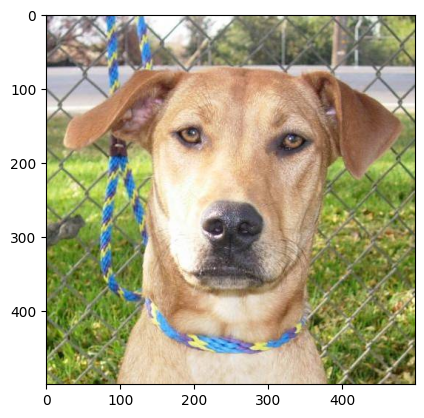

In [51]:
image = cv2.imread("/kaggle/working/dogs_vs_cats/test/dogs/dog.3704.jpg")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

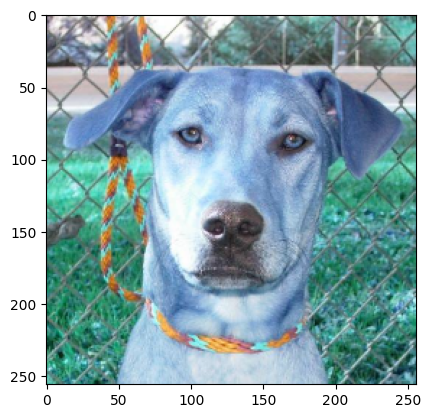

In [52]:
resize = tf.image.resize(image,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
yhat = best_model.predict(np.expand_dims(resize/255,0))


In [56]:
if yhat>0.5:
    print("This is a dog.")
else:
    print("This is a cat.")

This is a dog.


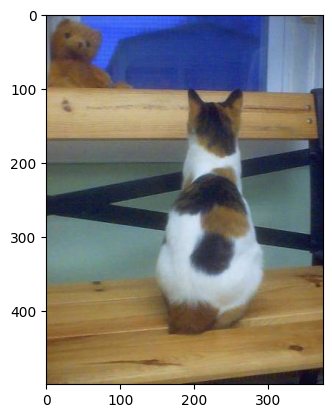

In [60]:
cats_test = cv2.imread("/kaggle/working/dogs_vs_cats/test/cats/cat.5552.jpg")
plt.imshow(cv2.cvtColor(cats_test,cv2.COLOR_BGR2RGB))
plt.show()

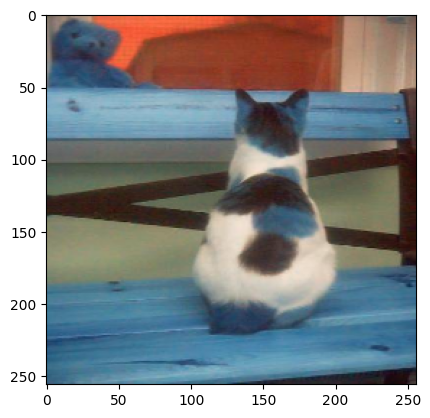

In [62]:
resize = tf.image.resize(cats_test,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
yhat = best_model.predict(np.expand_dims(resize/255,0))
print(yhat)

[[0.00831279]]


In [64]:
if yhat>0.5:
    print("This is a dog.")
else:
    print("This is a cat.")

This is a cat.


In [65]:
from tensorflow.keras.models import load_model

In [68]:
best_model.save("/kaggle/models/final_model.h5")